In [41]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import loompy as lp
import pickle

In [19]:
AHBA_exprs = pd.read_csv("AHBA_exprs_noNorm.csv", index_col=0)
AHBA_exprs.shape

(15746, 2748)

In [22]:
region2sample = pickle.load(open("region2sample.pkl", "rb"))

In [36]:
region_exprs = []
for region, sample_idxs in region2sample.items():
    region_exprs.append( AHBA_exprs[np.array(sample_idxs).astype(str)].mean(axis=1).values )
region_exprs = np.array(region_exprs)

In [35]:
np.array(region_exprs)

(123, 15746)

In [52]:
spearman_cor = np.corrcoef( stats.rankdata(region_exprs, axis=1) )
pearson_cor  = np.corrcoef(region_exprs)

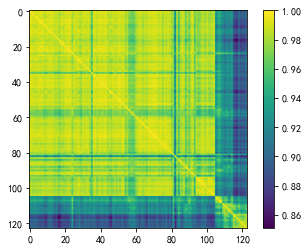

In [54]:
plt.imshow(pearson_cor)
plt.colorbar()
plt.show()

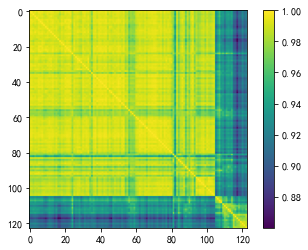

In [55]:
plt.imshow(spearman_cor)
plt.colorbar()
plt.show()